In [2]:
import os
import csv
import yaml

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [3]:
pd.__version__
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120

In [33]:
AARM_DEVICES = {
    # "jetson_cpu": "Nvidia Jetson CPU Only",
    # "jetson_gpu": "Nvidia Jetson GPU Enabled", 
    # "rpi4_cpu": "Raspberry Pi 4B"
} # pi3_cpu

x86_DEVICES= {
    # "herron_cpu": "Server Intel Xeon",
    # "herron_gpu": "Server Nvidia RTX-8000",
    # "lattepanda_cpu": "Latte Panda Edge x86 (No AVX2)",
    "laptop_cpu": "Laptop Intel-i7 (8th Generation)"
}

MODELS = {
    "feedforward",
    "rnn",
    "lstm",
#     "conv1d",
#     "conv2d",
#     "mha"
}


In [34]:
DEVICES = {**AARM_DEVICES, **x86_DEVICES}

In [35]:
results = {
    device: pd.read_csv(f"experiments/templates/1117_templates/{device}.csv")
    for device in DEVICES.keys()
}

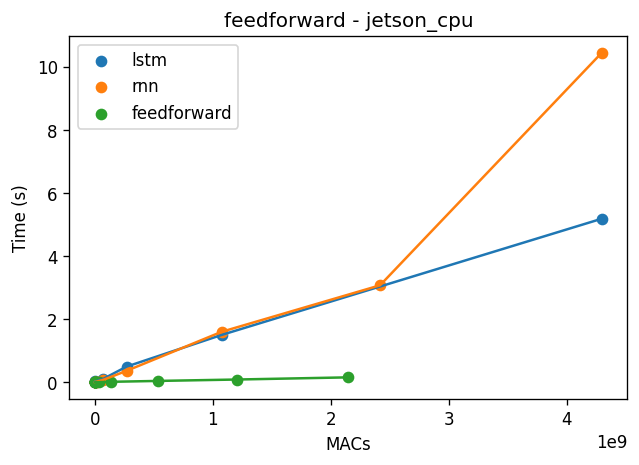

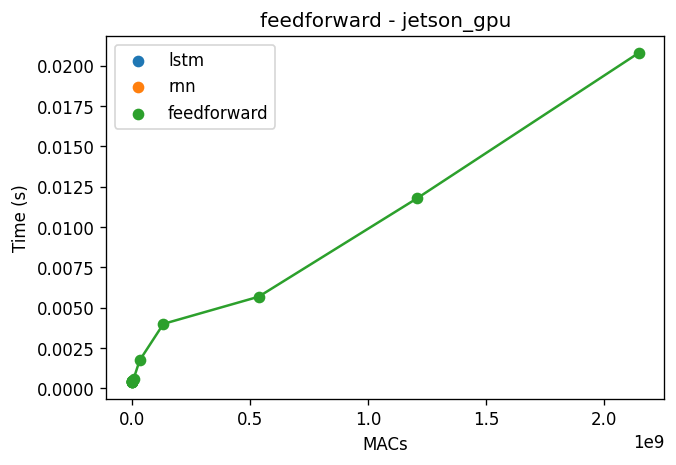

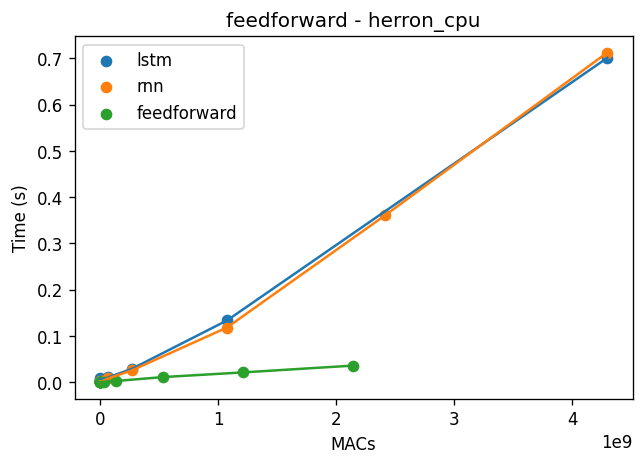

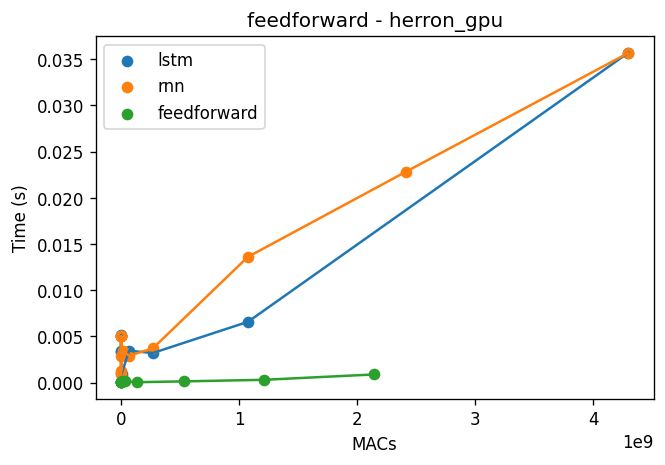

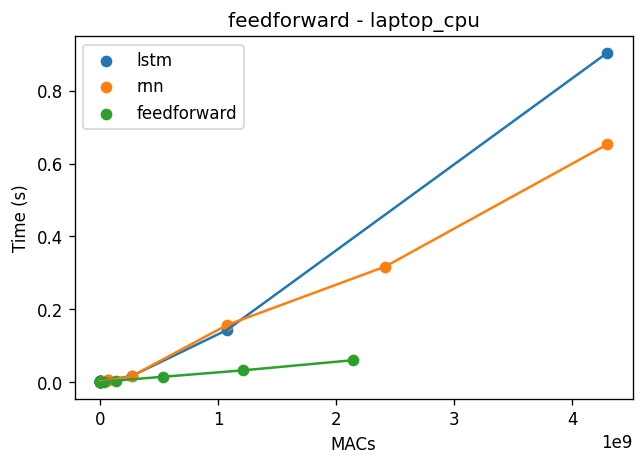

In [37]:
for device in DEVICES.keys():
    device_results = results[device]
    for model in MODELS:
        model_results = device_results.loc[device_results['model'] == model]
        for seq_len in sorted(list(set(device_results['seq_len']))):
            if np.isnan(seq_len): continue
            if seq_len != 128: continue
            seq_results = model_results.loc[model_results['seq_len'] == seq_len]
            mac_results = seq_results['macs']
            wallclock_result = seq_results['latency']
            hidden_dims = seq_results['hidden_dim']

            x_ax, x_label = mac_results, "MACs"
            y_ax, y_label = wallclock_result, "Time (s)"

            plt.xlabel(x_label)
            plt.ylabel(y_label)

            plt.scatter(x_ax, y_ax, label=f"{model}")
            plt.plot(x_ax,y_ax)
    plt.legend()
    plt.title(f"{model} - {device}")
    plt.show()
        # plt.legend()

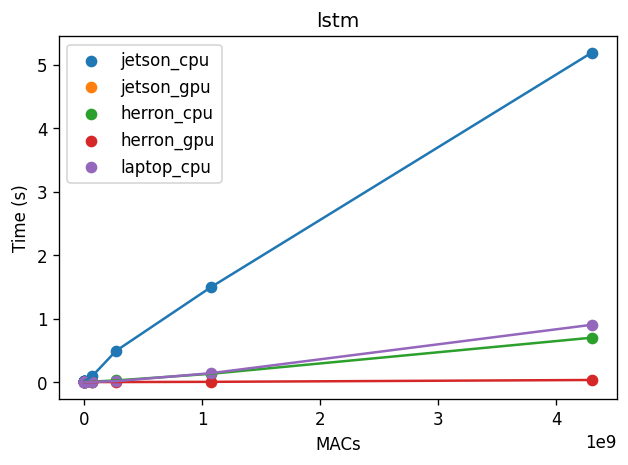

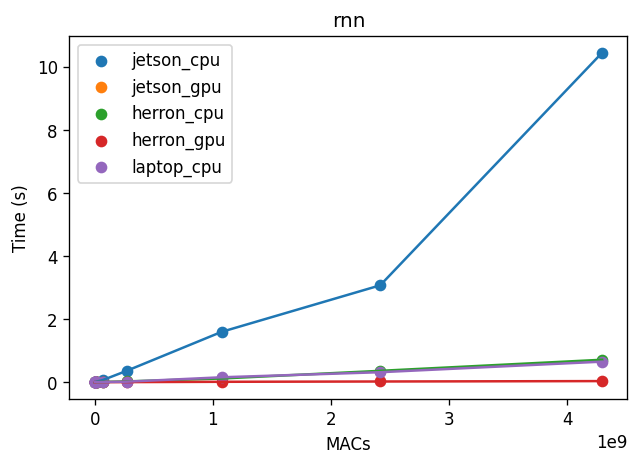

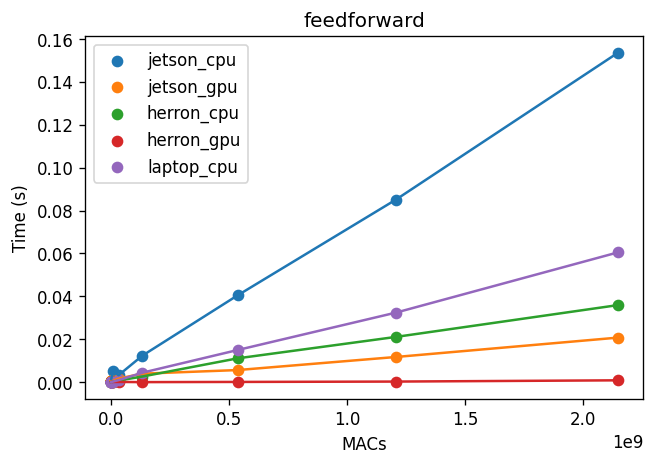

In [29]:
for model in MODELS:
    for device in DEVICES.keys():
        device_results = results[device]
        model_results = device_results.loc[device_results['model'] == model]
        for seq_len in sorted(list(set(device_results['seq_len']))):
            if np.isnan(seq_len): continue
            if seq_len != 128: continue
            seq_results = model_results.loc[model_results['seq_len'] == seq_len]
            mac_results = seq_results['macs']
            wallclock_result = seq_results['latency']
            hidden_dims = seq_results['hidden_dim']

            x_ax, x_label = mac_results, "MACs"
            y_ax, y_label = wallclock_result, "Time (s)"

            plt.xlabel(x_label)
            plt.ylabel(y_label)

            plt.scatter(x_ax, y_ax, label=f"{device}")
            plt.plot(x_ax,y_ax)
    plt.legend()
    plt.title(f"{model}")
    plt.show()
        # plt.legend()